In [ ]:
%pylab inline
import seaborn as sns;sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = 19,14
from collections import defaultdict
from itertools import chain
sns.set_context('poster',font_scale=1.4)

In [2]:
import galsim as gs

In [8]:
sensor = gs.sensor.SiliconSensor(rng=rng)

In [5]:
obj = gs.Gaussian(flux=10000, sigma=1.3)

In [7]:
rng = gs.BaseDeviate(5678)

In [12]:
im = gs.Image(64, 64, scale=0.3)

In [14]:
drawn = obj.drawImage(im, method='phot', poisson_flux=False, sensor=sensor, rng=rng)

In [22]:
drawn.array

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

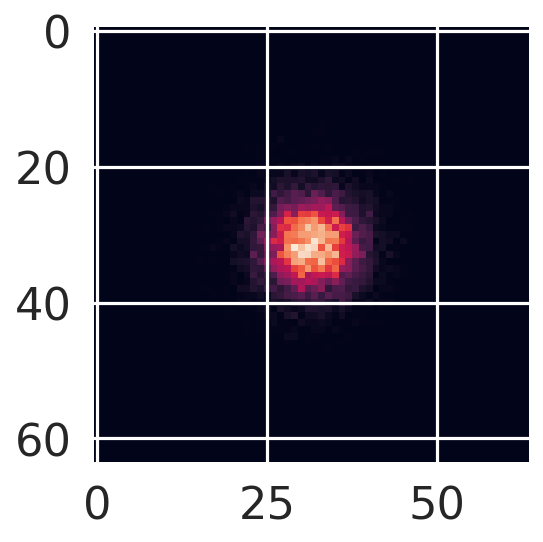

In [23]:
plt.imshow(drawn.array)

In [24]:
nobfe = obj.drawImage(im, method='phot', poisson_flux=False, rng=rng)

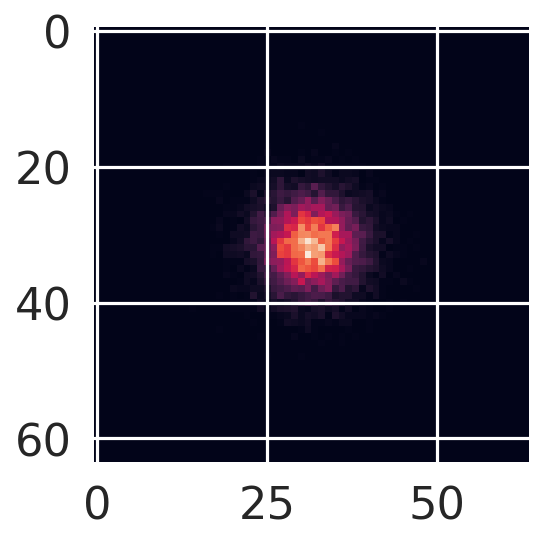

In [25]:
plt.imshow(nobfe.array)